In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [9]:
SUPER = "/media/lfc/ボリューム/M1/result/2022_02_08/piv/gx_48_gy_48_t_48_s_48_th_60/"
DIR = [SUPER + f"_{i}/" for i in range(1, 47)]

In [10]:
inj_int_sheet = pd.read_csv("inj_int.csv", index_col=0)

In [11]:
inj_int_sheet.head(10)

,Inj_0,Int_0,Inj_1,Int_1,Inj_2,Int_2,Inj_3,Int_3,Inj_4,Int_4,Inj_5,Int_5,Inj_6,Int_6,Inj_7,Int_7,Inj_8,Int_8,Inj_9,Int_9
1,252.0,402.0,552.0,702.0,852.0,1002.0,1152.0,1302.0,1452.0,1602.0,1752.0,1902.0,2052.0,2202.0,2352.0,2502.0,2652.0,2802.0,2952.0,3102.0
2,151.0,301.0,451.0,601.0,751.0,901.0,1051.0,1201.0,1351.0,1501.0,1651.0,1801.0,1951.0,2101.0,2251.0,2401.0,2551.0,2701.0,2851.0,3001.0
3,42.0,192.0,342.0,492.0,642.0,792.0,942.0,1092.0,1242.0,1392.0,1542.0,1692.0,1842.0,1992.0,2142.0,2292.0,2442.0,2592.0,2742.0,2892.0
4,66.0,216.0,366.0,516.0,666.0,816.0,966.0,1116.0,1266.0,1416.0,1566.0,1716.0,1866.0,2016.0,2166.0,2316.0,2466.0,2616.0,2766.0,2916.0
5,70.0,220.0,370.0,520.0,670.0,820.0,970.0,1120.0,1270.0,1420.0,1570.0,1720.0,1870.0,2020.0,2170.0,2320.0,2470.0,2620.0,2770.0,2920.0
6,73.0,223.0,373.0,523.0,673.0,823.0,973.0,1123.0,1273.0,1423.0,1573.0,1723.0,1873.0,2023.0,2173.0,2323.0,2473.0,2623.0,2773.0,2923.0
7,18.0,168.0,318.0,468.0,618.0,768.0,918.0,1068.0,1218.0,1368.0,1518.0,1668.0,1818.0,1968.0,2118.0,2268.0,2418.0,2568.0,2718.0,2868.0
8,229.0,379.0,529.0,679.0,829.0,979.0,1129.0,1279.0,1429.0,1579.0,1729.0,1879.0,2029.0,2179.0,2329.0,2479.0,2629.0,2779.0,2929.0,3079.0
9,57.0,207.0,357.0,507.0,657.0,807.0,957.0,1107.0,1257.0,1407.0,1557.0,1707.0,1857.0,2007.0,2157.0,2307.0,2457.0,2607.0,2757.0,2907.0
10,72.0,222.0,372.0,522.0,672.0,822.0,972.0,1122.0,1272.0,1422.0,1572.0,1722.0,1872.0,2022.0,2172.0,2322.0,2472.0,2622.0,2772.0,2922.0


In [12]:
def sum_vel(sum_v, flag_v, tmp_v):
    flag_v += np.where(np.isnan(tmp_v), 0, 1)
    sum_v = np.nansum(np.stack([sum_v, tmp_v]), axis=0)

    return sum_v, flag_v

In [13]:
cnt = 0

for q in range(3):
    sum_dx = np.zeros((48, 48))
    sum_dy = np.zeros((48, 48))
    flag_dx = np.zeros((48, 48))
    flag_dy = np.zeros((48, 48))

    for t in tqdm(range(5)):
        # 9T
        for n in range(9):
            # determine 1T
            inj_l = int(inj_int_sheet.iloc[cnt, 2 * n])

            # sum dX during 1T
            for i in range(inj_l, inj_l + 300):
                tmp_dx = np.loadtxt(DIR[cnt] + f"dx_{i}_{i+1}.csv", delimiter=',')
                tmp_dy = np.loadtxt(DIR[cnt] + f"dy_{i}_{i+1}.csv", delimiter=',')

                sum_dx, flag_dx = sum_vel(sum_dx, flag_dx, tmp_dx)
                sum_dy, flag_dy = sum_vel(sum_dy, flag_dy, tmp_dy)

        # +1T
        inj_l = int(inj_int_sheet.iloc[cnt, 18])

        if inj_l + 300 < 3201:
            for i in range(inj_l, inj_l + 300):
                tmp_dx = np.loadtxt(DIR[cnt] + f"dx_{i}_{i+1}.csv", delimiter=',')
                tmp_dy = np.loadtxt(DIR[cnt] + f"dy_{i}_{i+1}.csv", delimiter=',')

                sum_dx, flag_dx = sum_vel(sum_dx, flag_dx, tmp_dx)
                sum_dy, flag_dy = sum_vel(sum_dy, flag_dy, tmp_dy)

        else:
            for i in range(inj_l, 3201):  # right
                tmp_dx = np.loadtxt(DIR[cnt] + f"dx_{i}_{i+1}.csv", delimiter=',')
                tmp_dy = np.loadtxt(DIR[cnt] + f"dy_{i}_{i+1}.csv", delimiter=',')

                sum_dx, flag_dx = sum_vel(sum_dx, flag_dx, tmp_dx)
                sum_dy, flag_dy = sum_vel(sum_dy, flag_dy, tmp_dy)

            l = int(inj_int_sheet.iloc[cnt, 0]) - (300 + inj_l - 3201)

            for i in range(l, int(inj_int_sheet.iloc[cnt, 0])):  # left
                tmp_dx = np.loadtxt(DIR[cnt] + f"dx_{i}_{i+1}.csv", delimiter=',')
                tmp_dy = np.loadtxt(DIR[cnt] + f"dy_{i}_{i+1}.csv", delimiter=',')

                sum_dx, flag_dx = sum_vel(sum_dx, flag_dx, tmp_dx)
                sum_dy, flag_dy = sum_vel(sum_dy, flag_dy, tmp_dy)

        cnt += 1

    # average dX during 1T
    ave_dx = sum_dx / flag_dx
    ave_dy = sum_dy / flag_dy

    # save as csv
    np.savetxt(f"/media/lfc/ボリューム/M1/result/2022_02_08/post/gx_48_gy_48_t_48_s_48_th_60/500_500_{q+1}_dx.csv", ave_dx, delimiter=',')
    np.savetxt(f"/media/lfc/ボリューム/M1/result/2022_02_08/post/gx_48_gy_48_t_48_s_48_th_60/500_500_{q+1}_dy.csv", ave_dy, delimiter=',')

100%|██████████| 5/5 [05:22<00:00, 64.43s/it]


In [79]:
width, height = 739, 692
n = 48

x, y = np.meshgrid(np.linspace(0, width, n, dtype="int"), np.linspace(0, height, n, dtype="int"))

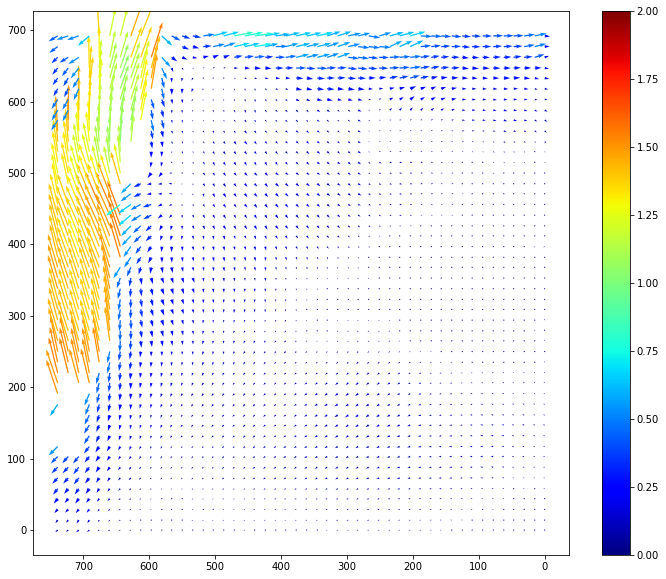

In [84]:
fig, ax = plt.subplots(figsize=(12, 10))
c = np.sqrt(ave_dx**2 + ave_dy**2)
im = ax.quiver(x, y, -ave_dx, ave_dy, c, cmap="jet")
ax.invert_xaxis()
fig.colorbar(im)
im.set_clim(0, 2)
plt.show()

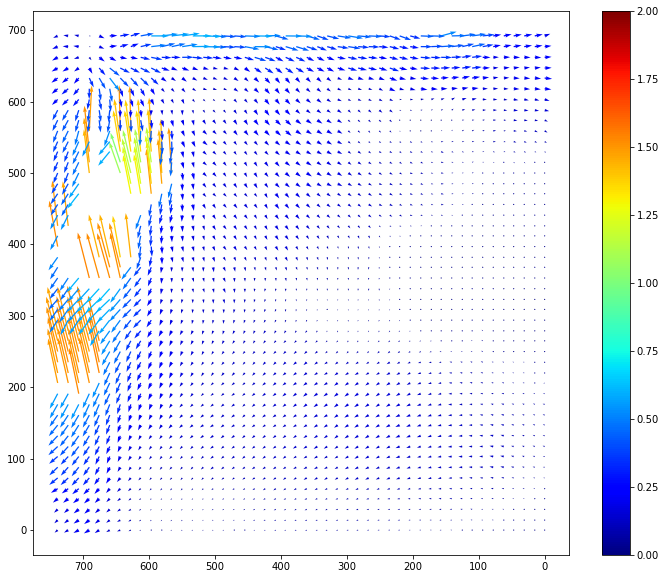

In [85]:
fig, ax = plt.subplots(figsize=(12, 10))
c = np.sqrt(ave_dx_int**2 + ave_dy_int**2)
im = ax.quiver(x, y, -ave_dx_int, ave_dy_int, c, cmap="jet")
ax.invert_xaxis()
fig.colorbar(im)
im.set_clim(0, 2)
plt.show()